<a href="https://colab.research.google.com/github/moebarati/CLS_Final_Project/blob/main/gen_balanced_dicts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install text2emotion
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
####### IMPORTING AND DOWNLOADING THE NECESSARY LIBARARIES AND MODULES
import pandas as pd
import re
import numpy as np
import seaborn as sn
import os
import json
import glob
import matplotlib.pyplot as plt
%matplotlib inline

from transformers import pipeline
import text2emotion as te

from collections import Counter
from google.colab import drive

import nltk
nltk.download('omw-1.4')

from ast import literal_eval

drive.mount('/content/gdrive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
first_period = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/1710-1780_final.csv'
second_period = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/1780-1850_final.csv'
third_period = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/1850-1920_final.csv'

In [ ]:
first = pd.read_csv(first_period)
second = pd.read_csv(second_period)
third = pd.read_csv(third_period)

In [ ]:
colours = ['red', 'tan', 'umber', 'rust', 'wood', 'black', 'white', 'hot', 'stone', 'french', 'gold', 'green', 'royal', 'amber', 'lime', 'iron', 'blue',
           'indian', 'brown', 'silver', 'olive', 'yellow', 'cream', 'imperial', 'plum', 'coffee', 'egyptian', 'punch', 'gray', 'burnt', 'purple', 'wheat',
           'persian', 'african', 'fossil', 'orange', 'pink', 'coral', 'electric', 'scarlet', 'turkish', 'crimson', 'pearl', 'ruby', 'peach', 'lemon', 'violet',
           'ecru', 'ivory', 'byzantine', 'aqua', 'bronze', 'prussian', 'carnation', 'chocolate', 'mellow', 'mustard', 'cedar', 'azure', 'walnut', 'ultra',
           'emerald', 'russet', 'tawny', 'pewter', 'lavender', 'indigo', 'raspberry', 'sapphire', 'olympic', 'flaxen', 'mulberry', 'artichoke', 'carmine',
           'seagreen', 'ochre', 'maroon', 'turquoise', 'floral', 'mauve', 'flamingo', 'creamy', 'fuchsia', 'brunette', 'sepia', 'khaki', 'magenta', 'cerise']

In [ ]:
def new_df(df):
  df = df.drop(columns=['ID', 'GENRE', 'SUBGENRE', 'NOTES', 'SOURCE', 'DOWNLOADED', 'COMMENTS', 'n_tokens'])
  df['n_tokens'] = ""
  for idx, row in df.iterrows():
    text = literal_eval(row['raw_text'])
    df.at[idx, 'n_tokens'] = len(text)
  return df

In [ ]:
first = new_df(first)
second = new_df(second)
third = new_df(third)

In [ ]:
first.head()

,FILE,PERIOD,QUARTCENT,DECADE,YEAR,TITLE,AUTHOR,GENDER,AUTHOR_BIRTH,raw_text,pos_text,lemmas,n_tokens
0,CLMET3_1_1_2.txt,1710-1780,1700-1724,1710s,1717,Three hours after marriage,"Gay, John",M,1685,"['--', 'but', 'prithee', 'sarsenet', 'make', '...","['--_:', 'But_CC', 'prithee_NP', 'Sarsenet_NP'...","['--', 'but', 'prithee', 'sarsenet', 'make', '...",3834
1,CLMET3_1_1_3.txt,1710-1780,1725-1749,1720s,1728,The beggarís opera,"Gay, John",M,1685,"['you', 'should', 'leave', 'those', 'to', 'you...","['You_PP', 'should_MD', 'leave_VB', 'those_DT'...","['you', 'should', 'leave', 'those', 'to', 'you...",4008
2,CLMET3_1_1_7.txt,1710-1780,1725-1749,1740s,1740,Pamela,"Richardson, Samuel",M,1689,"[',', 'what', 'i', 'said', 'to', 'you', 'befor...","[',_PUN', 'what_WP', 'I_PP', 'said_VBD', 'to_T...","[',', 'what', 'i', 'say', 'to', 'you', 'before...",49271
3,CLMET3_1_1_9.txt,1710-1780,1725-1749,1740s,1748,Clarissa,"Richardson, Samuel",M,1689,"['have', 'been', 'had', 'it', 'proceeded', ','...","['have_VB', 'been_VBN', 'had_VBD', 'it_PP', 'p...","['have', 'be', 'have', 'it', 'proceed', ',', '...",210545
4,CLMET3_1_1_11.txt,1710-1780,1725-1749,1730s,1731,The London merchant,"Lillo, George",M,1693,"['family', ')', 'that', 'you', 'were', ""entert...","['Family_NN', ')_BRR', 'that_IN', 'you_PP', 'w...","['family', ')', 'that', 'you', 'be', ""entertai...",4443


In [ ]:
def token_counts(df):
  pgt = df.groupby(['GENDER']).agg({'n_tokens': 'sum'})
  print(pgt)
  pgt.plot(kind = 'bar')
  plt.xticks(rotation = 90)
  plt.show()
  return

        n_tokens
GENDER          
F         914400
M         914623


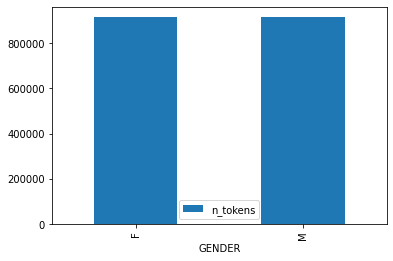

In [ ]:
token_counts(first)

        n_tokens
GENDER          
F        2857415
M        2857389


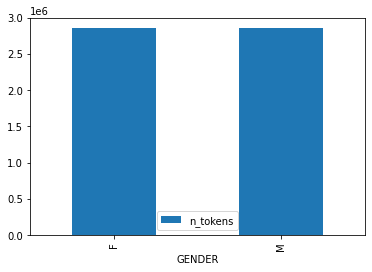

In [ ]:
token_counts(second)

        n_tokens
GENDER          
F        2276919
M        2276335


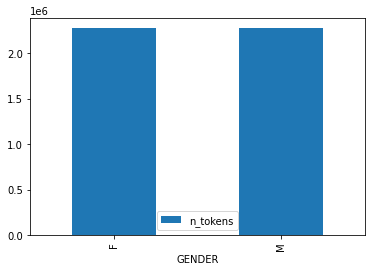

In [ ]:
token_counts(third)

In [ ]:
final_colours = ['red', 'umber', 'scarlet', 'crimson', 'ruby', 'maroon', 'orange', 'amber', 'yellow', 'ecru', 'flaxen', 'green', 'emerald',
                 'blue', 'azure', 'turquoise', 'purple', 'violet', 'indigo', 'mauve', 'pink', 'carnation', 'magenta', 'cerise', 'white', 'creamy',
                 'black', 'grey', 'gray', 'silver', 'brown', 'tawny', 'khaki', 'russet']

In [ ]:
colour_map = {'red': ['red', 'umber', 'scarlet', 'crimson', 'ruby', 'maroon'],
              'orange': ['orange', 'amber'],
              'yellow': ['yellow', 'ecru', 'flaxen'],
              'green': ['green', 'emerald'],
              'blue': ['blue', 'azure', 'turquoise'],
              'purple': ['purple', 'violet', 'indigo', 'mauve'],
              'pink': ['pink', 'carnation', 'magenta', 'cerise'],
              'white': ['white', 'creamy'],
              'black': ['black'],
              'grey': ['grey', 'gray', 'silver'],
              'brown': ['brown', 'tawny', 'khaki', 'russet']
              }

In [ ]:
def find_colours(df):
  for _, row in df.iterrows():
    tokens = literal_eval(row['pos_text'])
    file = row['FILE']
    for token in tokens:
      try:
        word = re.split('_', token)[0].lower()
        pos = re.split('_', token)[1]
      except IndexError:
        continue
      if word in final_colours and pos.startswith('J'):
        idx = tokens.index(token)
        text = tokens[idx-5 : idx+5]
        out = ' '.join([str(re.split('_', w)[0]) for w in text])
        print(str(file), ": from index ", str(idx-5), " to index ", str(idx+5), " -> ", out)
  return

In [ ]:
find_colours(first)

CLMET3_1_1_2.txt : from index  2589  to index  2599  ->  sneeze , and de large red spot appear on the
CLMET3_1_1_2.txt : from index  2589  to index  2599  ->  sneeze , and de large red spot appear on the
CLMET3_1_1_3.txt : from index  506  to index  516  ->  , and a Piece of black Padesoy to Mr. Peachum
CLMET3_1_1_7.txt : from index  1363  to index  1373  ->  of me , and my black apprehensions , would not
CLMET3_1_1_7.txt : from index  5931  to index  5941  ->  : your hand is so white and fine , I
CLMET3_1_1_7.txt : from index  1363  to index  1373  ->  of me , and my black apprehensions , would not
CLMET3_1_1_7.txt : from index  1363  to index  1373  ->  of me , and my black apprehensions , would not
CLMET3_1_1_7.txt : from index  1363  to index  1373  ->  of me , and my black apprehensions , would not
CLMET3_1_1_7.txt : from index  1363  to index  1373  ->  of me , and my black apprehensions , would not
CLMET3_1_1_7.txt : from index  5931  to index  5941  ->  : your hand is so white 

In [ ]:
find_colours(second)

CLMET3_1_2_89.txt : from index  1140  to index  1150  ->  lead him over in a white bridle , and let
CLMET3_1_2_90.txt : from index  2659  to index  2669  ->  his lips have left a red and angry spot upon
CLMET3_1_2_90.txt : from index  5757  to index  5767  ->  Where'er we march , a crimson flood `` Around us
CLMET3_1_2_90.txt : from index  6681  to index  6691  ->  pull'd down , and the black banner of the death
CLMET3_1_2_90.txt : from index  2659  to index  2669  ->  his lips have left a red and angry spot upon
CLMET3_1_2_92.txt : from index  2236  to index  2246  ->  at breakfast your eyes were red , and your spirits
CLMET3_1_2_92.txt : from index  8331  to index  8341  ->  here gives you ladies a yellow purple complexion , and
CLMET3_1_2_92.txt : from index  8332  to index  8342  ->  gives you ladies a yellow purple complexion , and then
CLMET3_1_2_92.txt : from index  8349  to index  8359  ->  a bright rose colour or blue drapery . Miss LOVELESS
CLMET3_1_2_92.txt : from index  131

In [ ]:
find_colours(third)

Streaming output truncated to the last 5000 lines.
CLMET3_1_3_199.txt : from index  1451  to index  1461  ->  to mingle with his magnificent white beard . A small
CLMET3_1_3_199.txt : from index  1451  to index  1461  ->  to mingle with his magnificent white beard . A small
CLMET3_1_3_199.txt : from index  1451  to index  1461  ->  to mingle with his magnificent white beard . A small
CLMET3_1_3_199.txt : from index  1451  to index  1461  ->  to mingle with his magnificent white beard . A small
CLMET3_1_3_199.txt : from index  4476  to index  4486  ->  face flushed with a dark red fire , and his
CLMET3_1_3_199.txt : from index  2801  to index  2811  ->  hair , snooded with a crimson ribbon and diamond clasp
CLMET3_1_3_199.txt : from index  1451  to index  1461  ->  to mingle with his magnificent white beard . A small
CLMET3_1_3_199.txt : from index  1771  to index  1781  ->  of melancholy in those dark brown eyes , that went
CLMET3_1_3_199.txt : from index  857  to index  867  ->  , the

In [ ]:
bert_classifier = pipeline("text-classification", model = 'bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores = False)
xlm_classifier = pipeline("text-classification", model = 'MilaNLProc/xlm-emo-t', return_all_scores = False)

def get_family(word):
  for key, val in colour_map.items():
    if word in val:
      return key

def save_dict(name: str, data: dict):
  f_name = 'dict_' + name + '_final.json'
  f_path = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/' + f_name
  with open(f_path, 'w') as file:
    json.dump(data, file)
  return

def text_emotion(segment):
  emotion = te.get_emotion(segment)
  max_emo = max(emotion, key = emotion.get)
  return max_emo

def bert_emotion(segment):
  emotion = bert_classifier(segment)
  bert_emo = emotion[0]['label']
  return bert_emo

def xlm_emotion(segment):
  emotion = xlm_classifier(segment)
  xlm_emo = emotion[0]['label']
  return xlm_emo

def gen_dict(df):
  data = {}
  df_name = [x for x in globals() if globals()[x] is df][0]
  for _, row in df.iterrows():
    tokens = literal_eval(row['pos_text'])
    
    file = row['FILE']
    period = row['PERIOD']
    quart = row['QUARTCENT']
    decade = row['DECADE']
    year = row['YEAR']
    title = row['TITLE']
    author = row['AUTHOR']
    gender = row['GENDER']
    birth = row['AUTHOR_BIRTH']

    name, _ = os.path.splitext(os.path.basename(file))
    name = re.split('_', name, maxsplit = 4)[3]
    for token in tokens:
      keys = {}
      try:
        word = re.split('_', token)[0].lower()
        pos = re.split('_', token)[1]
      except IndexError:
        continue
      if word in final_colours and pos.startswith('J'):
        keys['title'] = title
        keys['author'] = author
        keys['gender'] = gender
        keys['period'] = period
        keys['quartcent'] = quart
        keys['decade'] = decade
        keys['year'] = year
        keys['birth'] = birth
        keys['match'] = word
        keys['colour_family'] = get_family(word)
        idx = tokens.index(token)
        
        window = [5, 10, 15, 20, 25]
        for n in window:
          start_idx = idx - n
          end_idx = idx + (n + 1)
          text = tokens[start_idx : end_idx]
          key = 'text_' + str(n)
          segment = ' '.join([str(re.split('_', w)[0]) for w in text])
          keys[key] = segment
          t2e_key = 't2e_' + str(n)
          keys[t2e_key] = text_emotion(segment)
          bert_key = 'bert_' + str(n)
          keys[bert_key] = bert_emotion(segment)
          xlm_key = 'xlm_' + str(n)
          keys[xlm_key] = xlm_emotion(segment)
        id = 'f_' + str(name) + '_match_idx_' + str(idx)
        data[id] = keys
  save_dict(df_name, data)
  return

In [ ]:
gen_dict(first)

In [ ]:
gen_dict(second)

In [ ]:
gen_dict(third)